In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
data = pd.read_csv('customer_personality_analysis.csv')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
#Dt_customer to date time format and change it to years_customers
#how many years has the customer been a customer.

In [ ]:
from datetime import date
from datetime import datetime
data['Age'] = (2021 - data['Year_Birth'])
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')
days_in_year = 365.2425
date_now = datetime.strptime('Jan 1 2021', '%b %d %Y')
data['Years_customer'] = (pd.Timestamp('now').year) - (pd.to_datetime(data['Dt_Customer']).dt.year)

In [ ]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Years_customer
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,3,11,1,64,12
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,3,11,0,67,10
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,56,11
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,3,11,0,37,10
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,40,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,0,3,11,0,54,11
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,0,1,0,0,3,11,0,75,10
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,1,0,0,0,0,3,11,0,40,10
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,0,3,11,0,65,10


In [ ]:
#each customer sum up the total expenses and total accepted

In [ ]:
data['Total_Expenses'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']
data['Total_Acc_Cmp'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5'] + data['Response']

In [ ]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Years_customer          0
Total_Expenses          0
Total_Acc_Cmp           0
dtype: int64

In [ ]:
data.fillna(data.mean(), inplace=True)

<ipython-input-9-a20208f658ce>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data.fillna(data.mean(), inplace=True)
<ipython-input-9-a20208f658ce>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


In [ ]:
#24 null values from the income column
# age wise graph mostly 43 to 56 age are customers

Text(0.5, 1.0, 'Age')

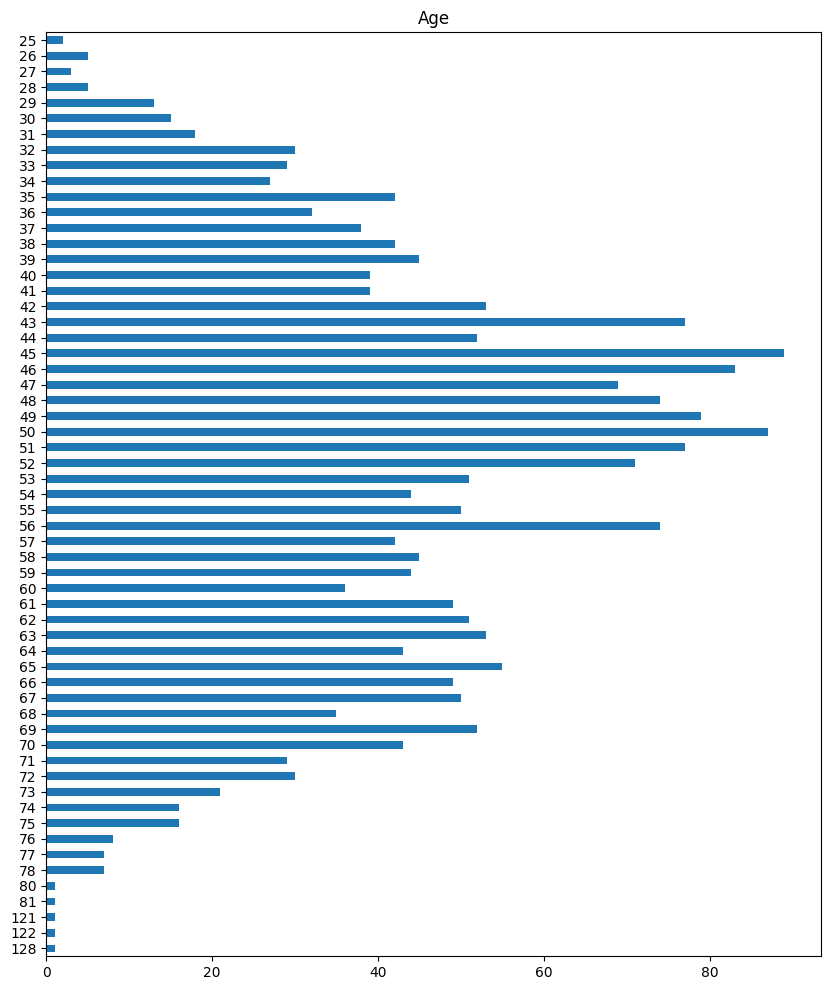

In [ ]:
plt.figure(figsize=(10,12))
data['Age'].value_counts().sort_index(ascending=False).plot(kind='barh')
plt.title('Age')

Text(0.5, 1.0, 'Income')

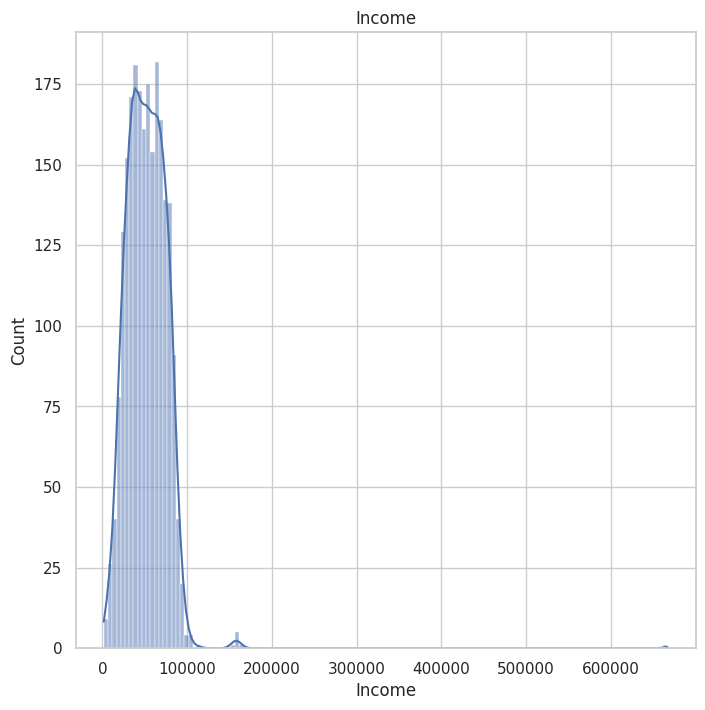

In [ ]:
plt.figure(figsize=(8,8))
sns.set(style='whitegrid')
ax = sns.histplot(data=data, x='Income',kde=True)
ax.set_title('Income')

In [ ]:
#most customers have the income range of 30000–800000.

<ipython-input-14-8b7f3ef34896>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, x='Education', saturation=1, alpha=0.9, palette='rocket', order=data['Education'].value_counts().index)


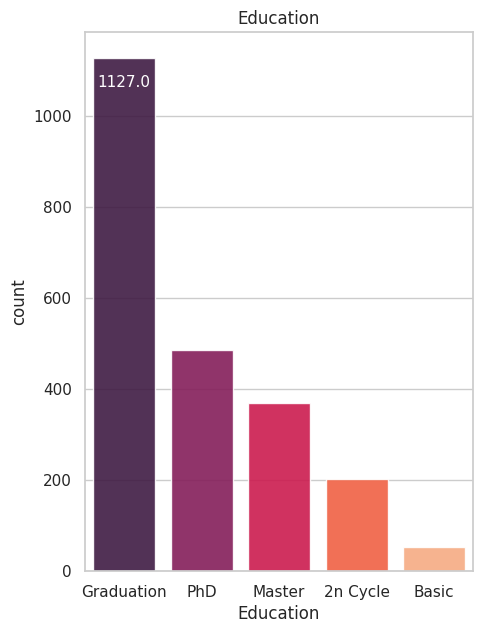

In [ ]:
plt.figure(figsize=(5, 7))
sns.set(style='whitegrid')
ax = sns.countplot(data=data, x='Education', saturation=1, alpha=0.9, palette='rocket', order=data['Education'].value_counts().index)
ax.set_title('Education')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=11)
    plt.show()

In [ ]:
#its like mostly graduated education background.

<ipython-input-16-b7c666e83e2a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, x='Marital_Status', saturation=1, alpha=0.9, palette='rocket', order=data['Marital_Status'].value_counts().index)


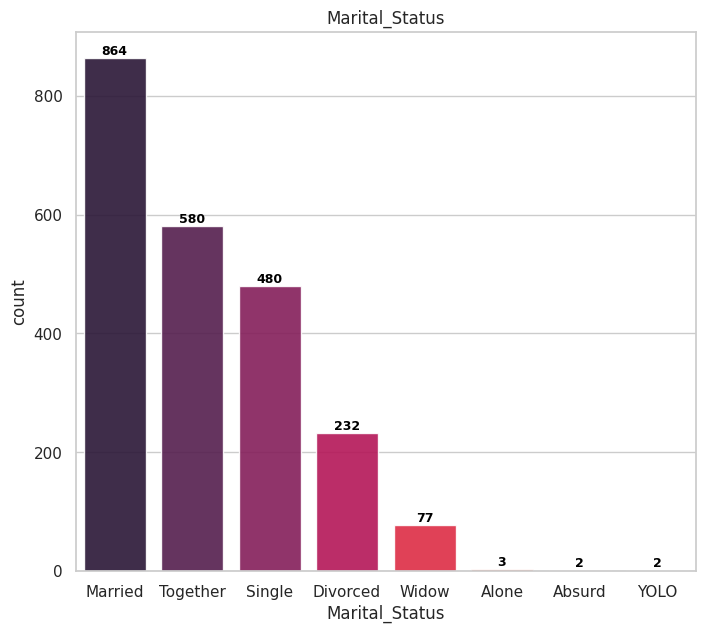

In [ ]:
plt.figure(figsize=(8, 7))
sns.set(style='whitegrid')
ax = sns.countplot(data=data, x='Marital_Status', saturation=1, alpha=0.9, palette='rocket', order=data['Marital_Status'].value_counts().index)
ax.set_title('Marital_Status')
for p in ax.patches:
    number = '{}'.format(p.get_height().astype('int64'))
    ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
    xytext=(0,5), textcoords='offset points', color='black', fontweight='semibold', fontsize=9)

In [ ]:
#most customers are already married.

<ipython-input-18-702c020024d9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, x='Kidhome', saturation=1, alpha=0.9, palette='rocket', order=data['Kidhome'].value_counts().index)


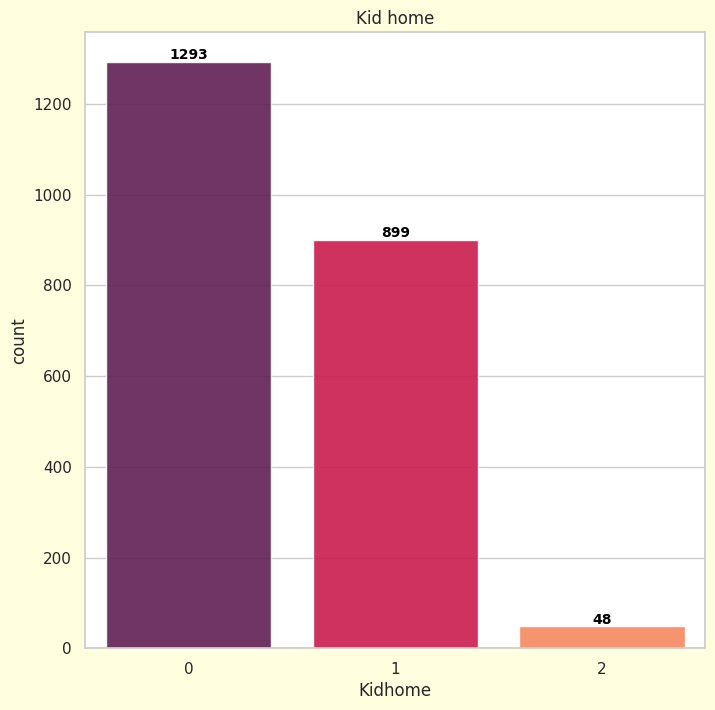

In [ ]:
plt.figure(figsize=(8, 8), facecolor='lightyellow')
sns.set(style='whitegrid')
ax = sns.countplot(data=data, x='Kidhome', saturation=1, alpha=0.9, palette='rocket', order=data['Kidhome'].value_counts().index)
ax.set_title('Kid home')
for p in ax.patches:
    number = '{}'.format(p.get_height().astype('int64'))
    ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
    xytext=(0,5), textcoords='offset points', color='black', fontweight='semibold', fontsize=10)

In [ ]:
#most customers don’t have any kids.

<ipython-input-20-ad73e63341ca>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, x='Teenhome', saturation=1, alpha=0.9, palette='rocket', order=data['Teenhome'].value_counts().index)


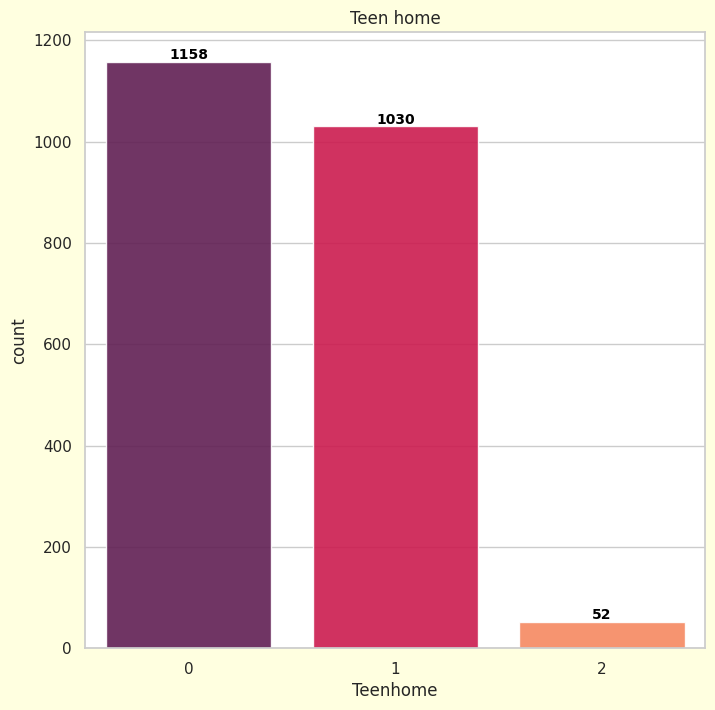

In [ ]:
plt.figure(figsize=(8, 8), facecolor='lightyellow')
sns.set(style='whitegrid')
ax = sns.countplot(data=data, x='Teenhome', saturation=1, alpha=0.9, palette='rocket', order=data['Teenhome'].value_counts().index)
ax.set_title('Teen home')
for p in ax.patches:
    number = '{}'.format(p.get_height().astype('int64'))
    ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
    xytext=(0,5), textcoords='offset points', color='black', fontweight='semibold', fontsize=10)

In [ ]:
#most customers don’t have any teens.

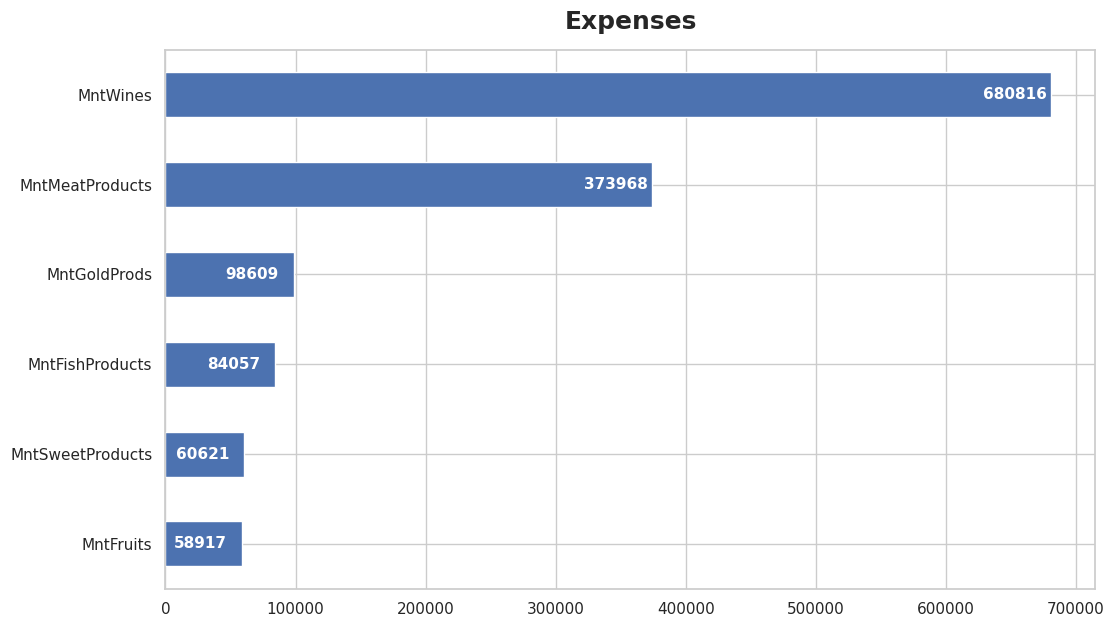

In [ ]:
plt.figure(figsize=(12,7))
ax = data[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum().sort_values(ascending=True).plot(kind='barh')
plt.title('Expenses', pad=15, fontsize=18, fontweight='semibold')
rects = ax.patches
for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    plt.annotate('{}'.format(x_value), (x_value, y_value), xytext=(-49, 0),
    textcoords='offset points', va='center', ha='left', color = 'white', fontsize=11, fontweight='semibold')

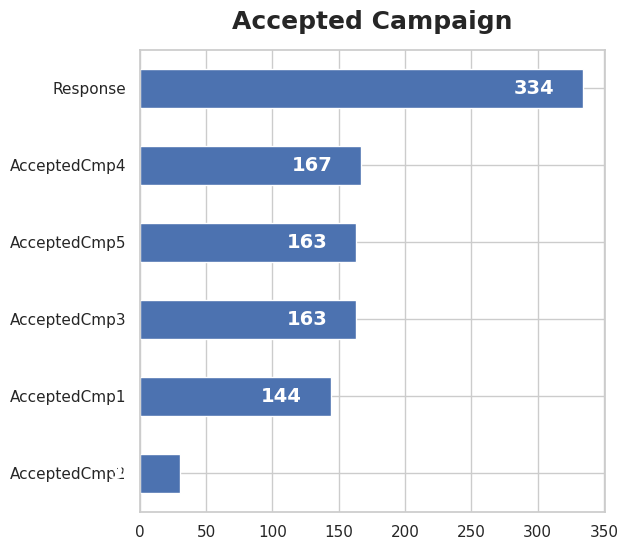

In [ ]:
plt.figure(figsize=(6,6))
ax = data[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4','AcceptedCmp5', 'Response']].sum().sort_values(ascending=True).plot(kind='barh')
plt.title('Accepted Campaign', pad=15, fontsize=18, fontweight='semibold')
rects = ax.patches
for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    plt.annotate('{}'.format(x_value), (x_value, y_value), xytext=(-50, 0),
    textcoords='offset points', va='center', ha='left', color = 'white', fontsize=14, fontweight='semibold')

In [ ]:
 #more people accepted the campaign. The highest value is on response

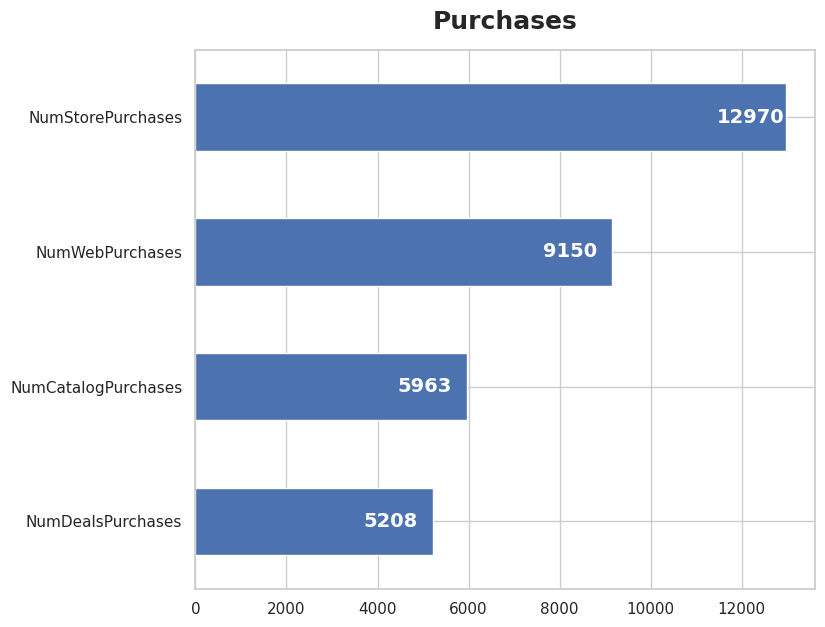

In [ ]:
plt.figure(figsize=(8,7))
ax = data[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum().sort_values(ascending=True).plot(kind='barh')
plt.title('Purchases', pad=15, fontsize=18, fontweight='semibold')
rects = ax.patches
for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    plt.annotate('{}'.format(x_value), (x_value, y_value), xytext=(-50, 0),
    textcoords='offset points', va='center', ha='left', color = 'white', fontsize=14, fontweight='semibold')

In [ ]:
# number of purchases made directly in stores is the highest.

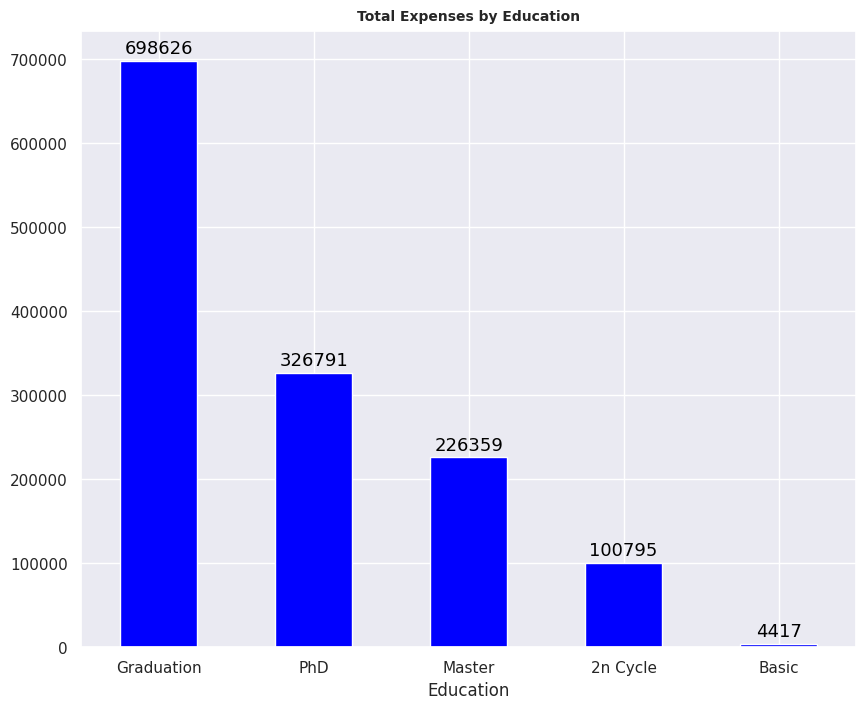

In [ ]:
sns.set()
ax = data[['Education','Total_Expenses']].groupby('Education').sum().sort_values(by='Total_Expenses', ascending=False).plot(kind='bar', figsize=(10,8), legend=None, color='blue')
plt.xticks(rotation=360)
plt.title('Total Expenses by Education', pad=8, fontsize=10, fontweight='semibold')
for p in ax.patches:
    number = '{}'.format(p.get_height().astype('int64'))
    ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
    xytext=(0,9), textcoords='offset points', color='black', fontsize=13)

In [ ]:
# educational level contributes the highest expense.

<Axes: >

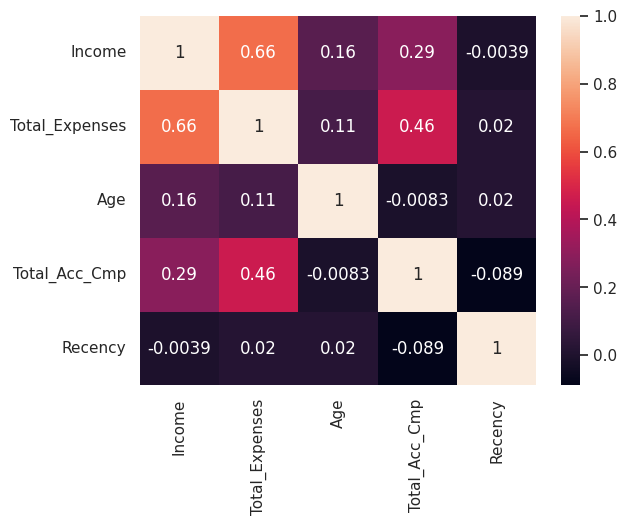

In [ ]:
sns.heatmap(data[['Income', 'Total_Expenses','Age', 'Total_Acc_Cmp', 'Recency']].corr(), annot=True)

In [ ]:
# The highest correlation is income and total expenses,
#followed by total expenses and total accepted campaign.

In [ ]:
data_prep = data.copy()
lenc = LabelEncoder()
lenc.fit(data_prep['Marital_Status'])
data_prep['Marital_Status'] = lenc.transform(data_prep['Marital_Status'])
edu = ['Basic', 'Graduation', 'Master', '2n Cycle', 'PhD']
ore = OrdinalEncoder(categories=([edu]))
ore.fit(data_prep[['Education']])
data_prep['Education'] = ore.transform(data_prep[['Education']])

In [ ]:
data_prep = data_prep.drop(['ID', 'Year_Birth', 'Dt_Customer', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','Response', 'Complain', 'Z_CostContact', 'Z_Revenue'], axis=1)
data_proc = data_prep.copy()

In [ ]:
scaler = StandardScaler()
std_scaler = np.array(data_proc[['Income','Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','Age', 'Years_customer', 'Total_Expenses', 'Total_Acc_Cmp']]).reshape(-1,19)
scaler.fit(std_scaler)
data_proc[['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','Age', 'Years_customer', 'Total_Expenses', 'Total_Acc_Cmp']] = scaler.transform(std_scaler)

In [ ]:
columns_to_scale = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Age', 'Years_customer', 'Total_Expenses', 'Total_Acc_Cmp']
scaler = StandardScaler()
data_proc[columns_to_scale] = scaler.fit_transform(data_proc[columns_to_scale])


In [ ]:
#K-means and agglomerative clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


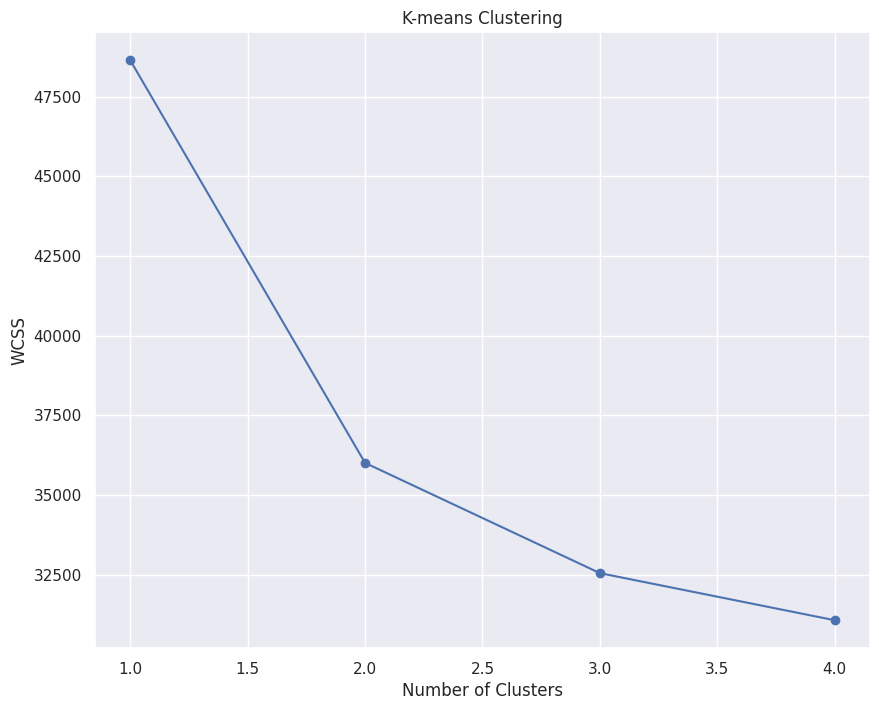

In [ ]:
wcss = []
plt.figure(figsize=(10, 8))
for i in range(1, 5):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_proc)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 5), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()



In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_proc)
label = kmeans.predict(data_proc)
data_segment = data_prep.copy()
data_segment['Segments'] = label
data_segment.groupby(['Segments']).mean()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Years_customer,Total_Expenses,Total_Acc_Cmp
Segments,,,,,,,,,,,,,,,,,,,,,
0,1.938106,3.722595,39031.689054,0.694258,0.555556,48.699478,99.410887,6.644295,36.932886,9.787472,...,22.178225,2.526473,2.945563,0.879940,3.934377,6.381805,50.987323,10.922446,181.674124,0.204325
1,2.025584,3.740823,71960.342615,0.071190,0.432703,49.720801,609.016685,55.625139,360.890990,78.901001,...,76.605117,2.024472,5.784205,5.320356,8.558398,3.727475,53.994438,11.045606,1238.446051,0.808676


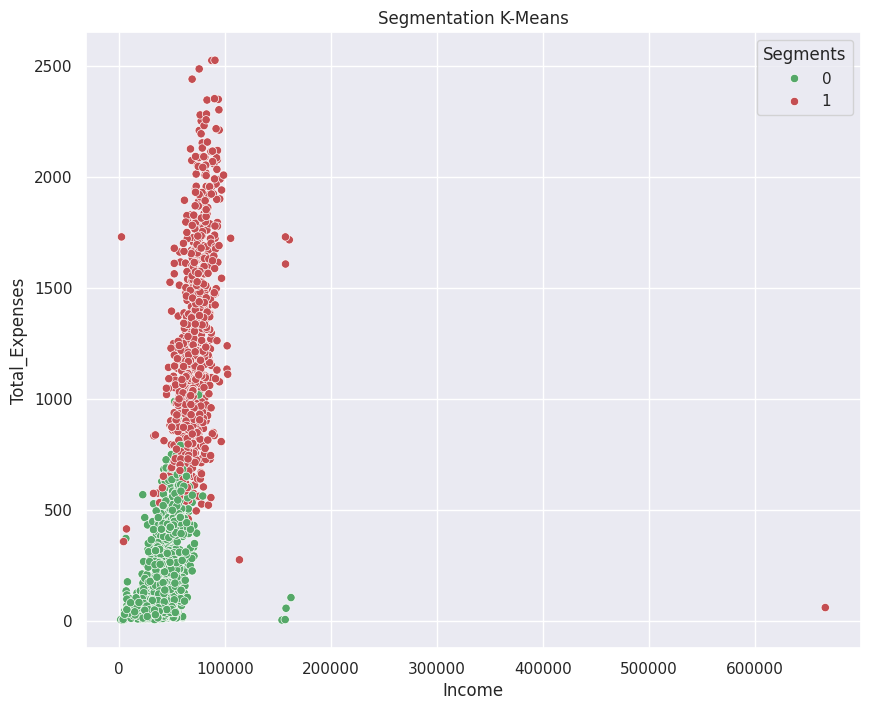

In [ ]:
plt.figure(figsize = (10,8))
sns.scatterplot(x = data_segment['Income'], y = data_segment['Total_Expenses'], hue = data_segment['Segments'], palette= ['g','r'])
plt.title('Segmentation K-Means')
plt.show()

In [ ]:
# Segment 0 (few opportunities) = Lower income, have more kids, higher deals purchase, higher web visits, low expense, low accepted campaign
# Segment 1 (well-off) = Higher income, less kids, high web, catalog, and store purchases, high expense, higher accepted campaign

In [ ]:
# Conclusion

# The clustering is mostly based on income, expenses, number of purchases by it’s category,
# Segment 0 which the customers had low income and low expenses. Segment 1
# which the customers had high income and high expenses, which is better to focus on.